In [1]:
!git clone https://github.com/Atharva-Malode/ML-Bootcamp.git

Cloning into 'ML-Bootcamp'...
remote: Enumerating objects: 425, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 425 (delta 102), reused 152 (delta 66), pack-reused 193
Receiving objects: 100% (425/425), 8.68 MiB | 12.85 MiB/s, done.
Resolving deltas: 100% (143/143), done.


In [2]:
!pip install wordcloud

In [3]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
df = pd.read_csv("/content/ML-Bootcamp/Week-3/Day-1/Dataset/SMSSpamCollection.txt", sep="\t", names = ['label','text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.shape

(5572, 2)

data cleaning

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
sn= SnowballStemmer("english")
stop=set(stopwords.words("english"))


In [41]:
def clean_text(sms):
  sms=sms.lower()
  sms=re.sub("[^a-z,^0-9]",' ',sms)
  sms=nltk.word_tokenize(sms)
  sms=[t for t in sms if len(t)>1]
  sms=[sn.stem(word) for word in sms if word not in stop]
  sms=' '.join(sms)
  return sms

In [42]:
clean_text("Get this stuff for free playing? just for Rs.10 b b")

'get stuff free play rs 10'

In [45]:
df["clean_text"]=df['text'].apply(clean_text)

In [46]:
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


wordcloud

In [48]:
from wordcloud import WordCloud

In [50]:
hamdata=df[df["label"]=="ham"]
hamdata = hamdata["clean_text"]

In [51]:
def wordcloud(data):
  words=''.join(data)
  wc=WordCloud(background_color="white")
  wc=wc.generate(words)
  plt.figure(figsize=(10,8))
  plt.imshow(wc)
  plt.axis("off")
  plt.show()

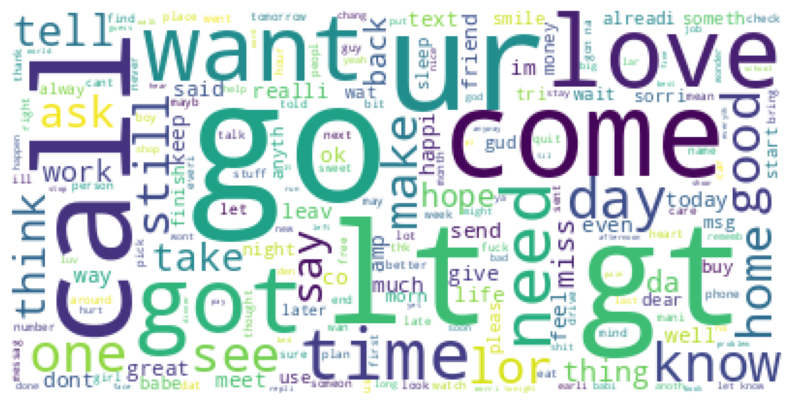

In [53]:
wordcloud(hamdata)

In [58]:
spamdata=df[df["label"]=="spam"]
spamdata = spamdata["clean_text"]


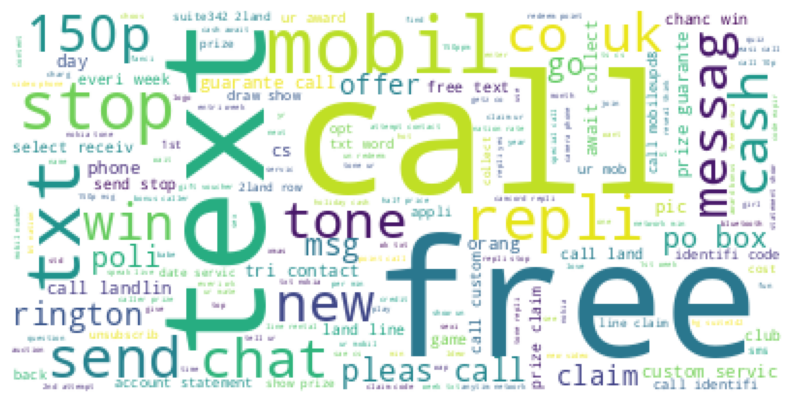

In [59]:
wordcloud(spamdata)

featurization

In [60]:
from sklearn.feature_extraction.text import CountVectorizer


In [61]:
cv=CountVectorizer()

In [71]:
X= cv.fit_transform(df['clean_text']).toarray()

In [72]:
X.shape

(5572, 5000)

In [64]:
cv=CountVectorizer(max_features=5000)

In [66]:
y=pd.get_dummies(df["label"])
y=y["spam"].values

In [67]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [68]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [74]:
from sklearn.naive_bayes import MultinomialNB

In [75]:
model=MultinomialNB()

In [76]:
model.fit(X_train,y_train)

MultinomialNB()

In [77]:
y_pred=model.predict(X_test)

In [78]:
y_test,y_pred

(array([0, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 0, 0], dtype=uint8))

In [81]:
pd.DataFrame({'actual':y_test,'predicted':y_pred})

,actual,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
1834,0,0
1835,0,0
1836,0,0
1837,0,0


### evaluation

In [82]:
print("accuracy on training data:")
print(model.score(X_train,y_train))

accuracy on training data:
0.99196356817573


In [83]:
print("acuracy on test data:")
print(model.score(X_test,y_test))

acuracy on test data:
0.989668297988037
